<a href="https://colab.research.google.com/github/vishwajeet7890/Heart_disease_detection/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'sample_data']


In [2]:
dataset = pd.read_csv("heart.csv")

In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [10]:
import os

# Step 1: Clone your repository
# Replace <YOUR_REPOSITORY_URL> with the actual URL of your Git repository
# For private repositories, you might use a format like:
# !git clone https://<YOUR_USERNAME>:<YOUR_PERSONAL_ACCESS_TOKEN>@github.com/<YOUR_USERNAME>/<YOUR_REPOSITORY_NAME>.git
!git clone <YOUR_REPOSITORY_URL>

# Determine the repository name from the URL to navigate into it
# This is a placeholder; you'll need to manually get the repo folder name
repo_name = "your_repo_folder_name" # e.g., if URL is github.com/user/my_project.git, then repo_name is 'my_project'

# Change to the repository directory
%cd {repo_name}

# Step 2: Configure Git with your user name and email
# This is important for your commits
!git config user.email "your_email@example.com"
!git config user.name "Your Name"

# Step 3: Make some changes (e.g., create or modify a file)
# For example, let's create a new file
!echo "This is a new file created in Colab." > new_file.txt

# Step 4: Check the status of your changes
!git status

# Step 5: Add the changes to the staging area
!git add .

# Step 6: Commit your changes
!git commit -m "Add new file from Colab"

# Step 7: Push your changes to the remote repository
# Replace <YOUR_BRANCH_NAME> with the branch you want to push to (e.g., main, master)
# If it's your first push to a new branch, you might need:
# !git push --set-upstream origin <YOUR_BRANCH_NAME>
!git push origin <YOUR_BRANCH_NAME>

# You might be prompted for your username and password or Personal Access Token (PAT).
# For security, using a PAT is recommended, especially for private repositories.

# Optional: Go back to the original directory if needed
# %cd ../

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `git clone <YOUR_REPOSITORY_URL>'
[Errno 2] No such file or directory: 'your_repo_folder_name'
/content
fatal: not in a git directory
fatal: not in a git directory
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `git push origin <YOUR_BRANCH_NAME>'


In [5]:
dataset.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [6]:
dataset.sample(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
945,54,1,3,125,273,0,2,152,0,0.5,3,0
1070,59,1,1,178,270,0,2,145,0,4.2,3,0
544,70,1,4,170,192,0,1,129,1,3.0,3,1
54,52,0,4,130,180,0,0,140,1,1.5,2,0
127,48,0,4,108,163,0,0,175,0,2.0,1,0


In [7]:
dataset.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [11]:
info = [
    "age",
    "1: male, 0: female",
    "chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic",
    "resting blood pressure",
    " serum cholestoral in mg/dl",
    "fasting blood sugar > 120 mg/dl",
    "resting electrocardiographic results (values 0,1,2)",
    " maximum heart rate achieved",
    "exercise induced angina",
    "oldpeak = ST depression induced by exercise relative to rest",
    "the slope of the peak exercise ST segment",
    "target (indicating presence of heart disease, 0 = no, 1 = yes)"
]

for i in range(len(dataset.columns)):
    print(dataset.columns[i] + ":\t\t\t" + info[i])

age:			age
sex:			1: male, 0: female
chest pain type:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
resting bp s:			resting blood pressure
cholesterol:			 serum cholestoral in mg/dl
fasting blood sugar:			fasting blood sugar > 120 mg/dl
resting ecg:			resting electrocardiographic results (values 0,1,2)
max heart rate:			 maximum heart rate achieved
exercise angina:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
ST slope:			the slope of the peak exercise ST segment
target:			target (indicating presence of heart disease, 0 = no, 1 = yes)


In [12]:
dataset["target"].describe()

,target
count,1190.000000
mean,0.528571
std,0.499393
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [13]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target                 1.000000
ST slope               0.505608
exercise angina        0.481467
chest pain type        0.460127
max heart rate         0.413278
oldpeak                0.398385
sex                    0.311267
age                    0.262029
fasting blood sugar    0.216695
cholesterol            0.198366
resting bp s           0.121415
resting ecg            0.073059
Name: target, dtype: float64


target
1    629
0    561
Name: count, dtype: int64


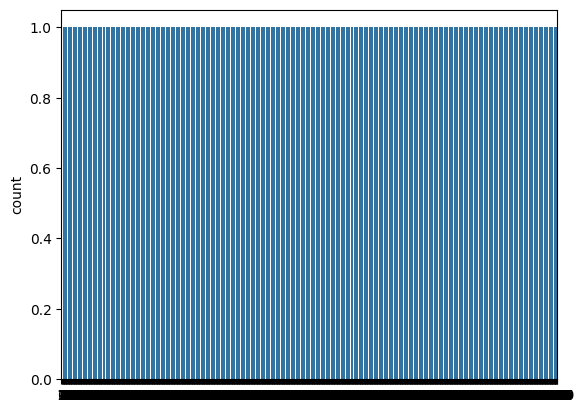

In [14]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [15]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 185.15
Percentage of patience with heart problems: 207.59


In [16]:
dataset["sex"].unique()

array([1, 0])

<Axes: xlabel='sex', ylabel='target'>

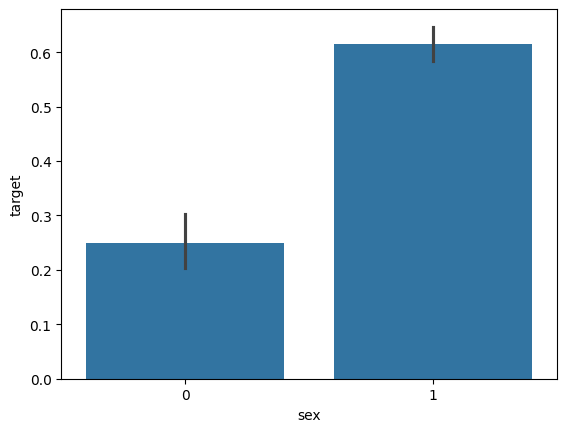

In [18]:
sns.barplot(x="sex", y="target", data=dataset)

In [20]:
dataset["chest pain type"].unique()

array([2, 3, 4, 1])

**Train and test split**

In [21]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [22]:
X_train.shape

(952, 11)

In [23]:
X_test.shape

(238, 11)

In [24]:
Y_train.shape

(952,)

In [25]:
Y_test.shape

(238,)

Model fitting

In [26]:
from sklearn.metrics import accuracy_score

Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)
Y_pred_lr.shape

(238,)

In [28]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 80.67 %


navie bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)
Y_pred_nb.shape

(238,)

In [30]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.29 %


In [32]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)
Y_pred_svm.shape

(238,)

In [33]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 80.25 %


K Nearest neighbour

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [35]:
Y_pred_knn.shape

(238,)

In [36]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 68.49 %


Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
print(Y_pred_dt.shape)


(238,)


In [38]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 88.24 %


Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
Y_pred_rf.shape


(238,)

In [40]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 94.96 %


In [41]:
from keras.models import Sequential
from keras.layers import Dense

In [44]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [45]:
model.fit(X_train,Y_train,epochs=200)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5249 - loss: 52.5694
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5100 - loss: 40.9191 
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5135 - loss: 28.1692 
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5112 - loss: 15.8365 
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4660 - loss: 5.5769
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4911 - loss: 4.3042
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 3.6499
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4917 - loss: 3.6827
Epoch 9/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4850 - loss: 3.5965
Epoch 10/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4892 - loss: 3.3041
Epoch 11/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4936 - loss: 2.8951
Epoch 12/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - ac

In [46]:
Y_pred_nn = model.predict(X_test)
Y_pred_nn.shape

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


(238, 1)

In [47]:

rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11.


The accuracy score achieved using Neural Network is: 79.41 %


In [49]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 80.67 %
The accuracy score achieved using Naive Bayes is: 85.29 %
The accuracy score achieved using Support Vector Machine is: 80.25 %
The accuracy score achieved using K-Nearest Neighbors is: 68.49 %
The accuracy score achieved using Decision Tree is: 88.24 %
The accuracy score achieved using Random Forest is: 94.96 %
The accuracy score achieved using Neural Network is: 79.41 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

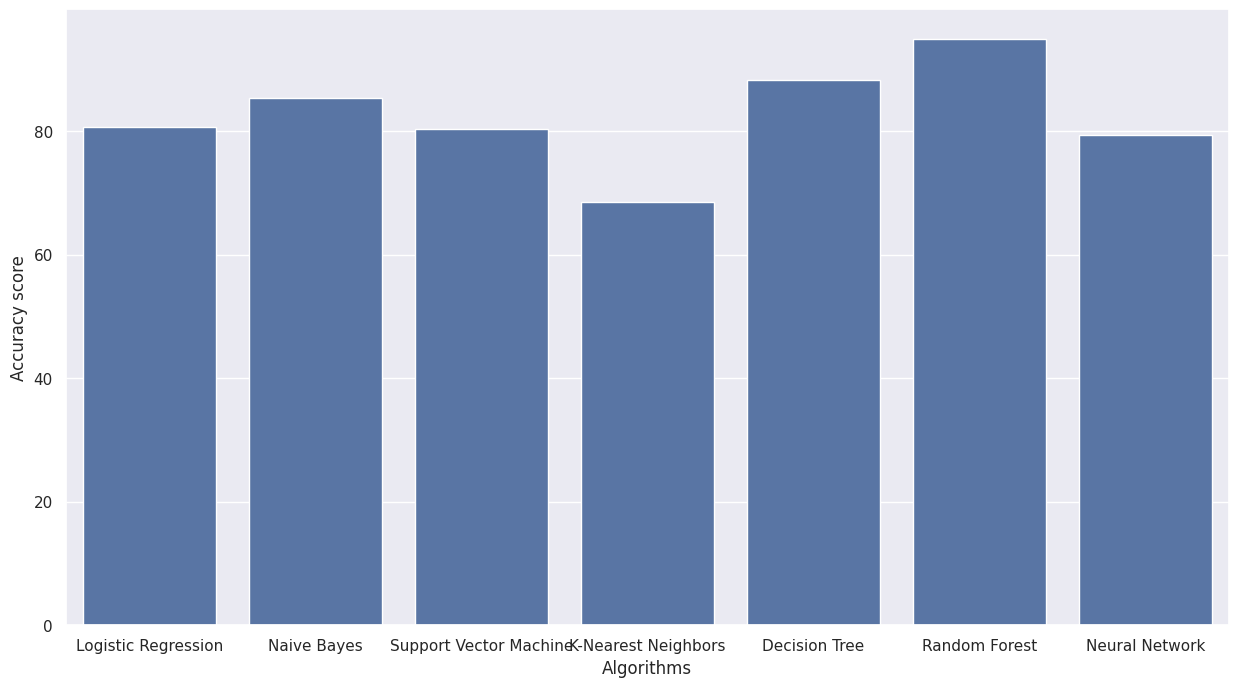

In [51]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms, y=scores)

In [60]:
# Step 1: Clone your GitHub repository (or navigate to it if already cloned)
# IMPORTANT: Replace <YOUR_REPOSITORY_URL> with the actual URL of your Git repository.
# If your repository is private, you might use a format like:
# !git clone https://<YOUR_USERNAME>:<YOUR_PERSONAL_ACCESS_TOKEN>@github.com/<YOUR_USERNAME>/<YOUR_REPOSITORY_NAME>.git
!git clone https://github.com/vishwajeet7890/Heart_disease_detection

# IMPORTANT: Replace 'your_repo_folder_name' with the actual name of the folder
# created by the git clone command (e.g., if your URL ends with my_project.git, the folder name is 'my_project').
repo_name = "Heart_disease_detection"

# Change to the repository directory
%cd {repo_name}

Cloning into 'Heart_disease_detection'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.
/content/Heart_disease_detection


Once you are in your repository directory, you need to configure your Git user details. Replace your email and name below.

In [61]:
# Step 2: Configure Git with your user name and email
# IMPORTANT: Replace with your GitHub registered email and username.
!git config user.email "vishwajeetsahani789@gmail.com"
!git config user.name "vishwajeet7890"

After cloning and configuring Git, you need to save *this* Colab notebook file into the cloned repository folder. You can do this by going to `File > Save a copy to GitHub` or `File > Download > Download .ipynb` and then manually uploading the `.ipynb` file into the correct folder within your cloned repository in the Colab file browser (left sidebar).

Once the notebook is saved inside your repository's folder, you can proceed to stage, commit, and push your changes.

In [55]:
# Step 3: Check the status of your changes (to see your new notebook file)
!git status

fatal: not a git repository (or any of the parent directories): .git


In [56]:
# Step 4: Add the notebook file to the staging area
# Replace 'your_notebook_name.ipynb' with the actual name of your notebook file.
!git add Heart_disease_detection.ipynb

# Alternatively, to add all new/modified files:
# !git add .

fatal: not a git repository (or any of the parent directories): .git


In [57]:
# Step 5: Commit your changes
# Replace 'Add initial notebook' with a meaningful commit message.
!git commit -m "Add initial notebook"

fatal: not a git repository (or any of the parent directories): .git


In [58]:
# Step 6: Push your changes to the remote repository
# IMPORTANT: Replace <YOUR_BRANCH_NAME> with the branch you want to push to (e.g., main, master).
# If it's your first push to a new branch, you might need to use:
# !git push --set-upstream origin <YOUR_BRANCH_NAME>
!git push origin <Main>

# If prompted for credentials and you're using a PAT, paste your PAT when asked for the password.

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `git push origin <YOUR_BRANCH_NAME>'
